In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from fontTools.merge.util import avg_int
from seaborn import heatmap
from soupsieve.util import lower


def load_data(path):
  return pd.read_excel(path)

In [82]:
df = load_data('sample_data/PSS.xlsx')
df = df.drop(['Професія ', 'Вік', 'Timestamp', 'Email Address','Стать'], axis=1)
df.head(40)

,1. Як часто останнього місяця Ви турбувалися через непередбачені події?,2. Як часто за останній місяць Вам видавалося складним контролювати важливі в Вашому житті речі?,3. Як часто за останній місяць Ви відчували нервову напругу чи стрес?,"4. Як часто за останній місяць Ви відчували впевненість у тому, що впораєтеся з вирішенням Ваших особистих проблем?","5. Як часто за останній місяць Ви відчували, що все йде так, як Ви цього хотіли?","6. Як часто останнього місяця Ви думали, що не зможете впоратися з усім тим, що Вам було треба зробити?",7. Як часто останнього місяця Ви могли дати собі раду з Вашою дратівливістю?,"8. Як часто останнього місяця Ви відчували, що володієте ситуацією?","9. Як часто останнього місяця Ви відчували роздратування через те, що події, які відбуваються, виходили з-під Вашого контролю?","10. Як часто останнього місяця Вам здавалося, що труднощів нагромаджується стільки, що Ви не в змозі їх контролювати?"
0,Доволі часто,Часто,Часто,Часто,Інколи,Доволі часто,Часто,Інколи,Доволі часто,Доволі часто
1,Часто,Доволі часто,Часто,Доволі часто,Інколи,Майже ніколи,Майже ніколи,Інколи,Часто,Часто
2,Інколи,Ніколи,Майже ніколи,Доволі часто,Часто,Майже ніколи,Часто,Доволі часто,Ніколи,Ніколи
3,Майже ніколи,Інколи,Інколи,Інколи,Доволі часто,Інколи,Часто,Доволі часто,Майже ніколи,Майже ніколи
4,Доволі часто,Інколи,Інколи,Інколи,Інколи,Інколи,Часто,Часто,Інколи,Інколи
5,Майже ніколи,Майже ніколи,Ніколи,Доволі часто,Часто,Майже ніколи,Доволі часто,Часто,Інколи,Ніколи
6,Майже ніколи,Майже ніколи,Доволі часто,Майже ніколи,Часто,Інколи,Доволі часто,Доволі часто,Інколи,Інколи
7,Доволі часто,Доволі часто,Доволі часто,Доволі часто,Часто,Інколи,Доволі часто,Доволі часто,Інколи,Ніколи
8,Майже ніколи,Ніколи,Ніколи,Часто,Часто,Ніколи,Ніколи,Часто,Майже ніколи,Ніколи
9,Доволі часто,Інколи,Часто,Інколи,Інколи,Доволі часто,Майже ніколи,Інколи,Доволі часто,Інколи


In [83]:
df.head(32)

,1. Як часто останнього місяця Ви турбувалися через непередбачені події?,2. Як часто за останній місяць Вам видавалося складним контролювати важливі в Вашому житті речі?,3. Як часто за останній місяць Ви відчували нервову напругу чи стрес?,"4. Як часто за останній місяць Ви відчували впевненість у тому, що впораєтеся з вирішенням Ваших особистих проблем?","5. Як часто за останній місяць Ви відчували, що все йде так, як Ви цього хотіли?","6. Як часто останнього місяця Ви думали, що не зможете впоратися з усім тим, що Вам було треба зробити?",7. Як часто останнього місяця Ви могли дати собі раду з Вашою дратівливістю?,"8. Як часто останнього місяця Ви відчували, що володієте ситуацією?","9. Як часто останнього місяця Ви відчували роздратування через те, що події, які відбуваються, виходили з-під Вашого контролю?","10. Як часто останнього місяця Вам здавалося, що труднощів нагромаджується стільки, що Ви не в змозі їх контролювати?"
0,Доволі часто,Часто,Часто,Часто,Інколи,Доволі часто,Часто,Інколи,Доволі часто,Доволі часто
1,Часто,Доволі часто,Часто,Доволі часто,Інколи,Майже ніколи,Майже ніколи,Інколи,Часто,Часто
2,Інколи,Ніколи,Майже ніколи,Доволі часто,Часто,Майже ніколи,Часто,Доволі часто,Ніколи,Ніколи
3,Майже ніколи,Інколи,Інколи,Інколи,Доволі часто,Інколи,Часто,Доволі часто,Майже ніколи,Майже ніколи
4,Доволі часто,Інколи,Інколи,Інколи,Інколи,Інколи,Часто,Часто,Інколи,Інколи
5,Майже ніколи,Майже ніколи,Ніколи,Доволі часто,Часто,Майже ніколи,Доволі часто,Часто,Інколи,Ніколи
6,Майже ніколи,Майже ніколи,Доволі часто,Майже ніколи,Часто,Інколи,Доволі часто,Доволі часто,Інколи,Інколи
7,Доволі часто,Доволі часто,Доволі часто,Доволі часто,Часто,Інколи,Доволі часто,Доволі часто,Інколи,Ніколи
8,Майже ніколи,Ніколи,Ніколи,Часто,Часто,Ніколи,Ніколи,Часто,Майже ніколи,Ніколи
9,Доволі часто,Інколи,Часто,Інколи,Інколи,Доволі часто,Майже ніколи,Інколи,Доволі часто,Інколи


In [84]:
data_dict = {'Ніколи': 0, 'Майже ніколи': 1, 'Інколи': 2, 'Часто': 3, 'Доволі часто': 4}
data_dict_reverse = {'Ніколи': 4, 'Майже ніколи': 3, 'Інколи': 2, 'Часто': 1, 'Доволі часто': 0}
reverse_ans_index = [0, 1, 2, 5, 8, 9]
df = df.ffill()
def replace_categories(df, data_dict, column_name, default_value=-1):
       df[column_name] = df[column_name].map(data_dict).fillna(default_value)
       return df
for col in df.columns:
  if df.columns.get_loc(col) in reverse_ans_index:
    df = replace_categories(df, data_dict, col)
  else:
    df = replace_categories(df, data_dict_reverse, col)

for col in df.select_dtypes(include=['object']):
  df[col] = df[col].astype('category')
  df[col] = df[col].cat.codes

df.head(32)

,1. Як часто останнього місяця Ви турбувалися через непередбачені події?,2. Як часто за останній місяць Вам видавалося складним контролювати важливі в Вашому житті речі?,3. Як часто за останній місяць Ви відчували нервову напругу чи стрес?,"4. Як часто за останній місяць Ви відчували впевненість у тому, що впораєтеся з вирішенням Ваших особистих проблем?","5. Як часто за останній місяць Ви відчували, що все йде так, як Ви цього хотіли?","6. Як часто останнього місяця Ви думали, що не зможете впоратися з усім тим, що Вам було треба зробити?",7. Як часто останнього місяця Ви могли дати собі раду з Вашою дратівливістю?,"8. Як часто останнього місяця Ви відчували, що володієте ситуацією?","9. Як часто останнього місяця Ви відчували роздратування через те, що події, які відбуваються, виходили з-під Вашого контролю?","10. Як часто останнього місяця Вам здавалося, що труднощів нагромаджується стільки, що Ви не в змозі їх контролювати?"
0,4,3,3,1,2,4,1,2,4,4
1,3,4,3,0,2,1,3,2,3,3
2,2,0,1,0,1,1,1,0,0,0
3,1,2,2,2,0,2,1,0,1,1
4,4,2,2,2,2,2,1,1,2,2
5,1,1,0,0,1,1,0,1,2,0
6,1,1,4,3,1,2,0,0,2,2
7,4,4,4,0,1,2,0,0,2,0
8,1,0,0,1,1,0,4,1,1,0
9,4,2,3,2,2,4,3,2,4,2


In [85]:
df_numpy = df.to_numpy()
result = []
print(len(df_numpy))
print(df_numpy[0])
for i in range(0, len(df_numpy)):
  result.append(sum(df_numpy[i]))
df['Результат PSS(числовий)'] = result
describe_result = []
for val in df['Результат PSS(числовий)']:
  if val in list(range(0,14)):
    describe_result.append('Низький рівень стресу')
  elif val in list(range(14,27)):
    describe_result.append('Середній рівень стресу')
  elif val in list(range(27,40)):
    describe_result.append('Високий рівень стресу')
print(describe_result)
df['Результат PSS(текстовий)'] = describe_result
df.head(32)

34
[4 3 3 1 2 4 1 2 4 4]
['Високий рівень стресу', 'Середній рівень стресу', 'Низький рівень стресу', 'Низький рівень стресу', 'Середній рівень стресу', 'Низький рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу', 'Низький рівень стресу', 'Високий рівень стресу', 'Низький рівень стресу', 'Середній рівень стресу', 'Високий рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу', 'Високий рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу', 'Високий рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу', 'Низький рівень стресу', 'Низький рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу', 'Низький рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу', 'Середній рівень стресу']


,1. Як часто останнього місяця Ви турбувалися через непередбачені події?,2. Як часто за останній місяць Вам видавалося складним контролювати важливі в Вашому житті речі?,3. Як часто за останній місяць Ви відчували нервову напругу чи стрес?,"4. Як часто за останній місяць Ви відчували впевненість у тому, що впораєтеся з вирішенням Ваших особистих проблем?","5. Як часто за останній місяць Ви відчували, що все йде так, як Ви цього хотіли?","6. Як часто останнього місяця Ви думали, що не зможете впоратися з усім тим, що Вам було треба зробити?",7. Як часто останнього місяця Ви могли дати собі раду з Вашою дратівливістю?,"8. Як часто останнього місяця Ви відчували, що володієте ситуацією?","9. Як часто останнього місяця Ви відчували роздратування через те, що події, які відбуваються, виходили з-під Вашого контролю?","10. Як часто останнього місяця Вам здавалося, що труднощів нагромаджується стільки, що Ви не в змозі їх контролювати?",Результат PSS(числовий),Результат PSS(текстовий)
0,4,3,3,1,2,4,1,2,4,4,28,Високий рівень стресу
1,3,4,3,0,2,1,3,2,3,3,24,Середній рівень стресу
2,2,0,1,0,1,1,1,0,0,0,6,Низький рівень стресу
3,1,2,2,2,0,2,1,0,1,1,12,Низький рівень стресу
4,4,2,2,2,2,2,1,1,2,2,20,Середній рівень стресу
5,1,1,0,0,1,1,0,1,2,0,7,Низький рівень стресу
6,1,1,4,3,1,2,0,0,2,2,16,Середній рівень стресу
7,4,4,4,0,1,2,0,0,2,0,17,Середній рівень стресу
8,1,0,0,1,1,0,4,1,1,0,9,Низький рівень стресу
9,4,2,3,2,2,4,3,2,4,2,28,Високий рівень стресу


In [86]:
df1 = load_data('sample_data/PSS.xlsx')
df1 = df1.iloc[:, [1,2,3,-1]]
df1 = df1.ffill()
df1 = df1.astype(object)
df = df.astype(object)
df1 = df1.convert_dtypes()
df = df.convert_dtypes()
dffull = df1.join(df, lsuffix='_df1', rsuffix='_df')
dffull.head(32)

,Стать,Вік,Професія,Email Address,1. Як часто останнього місяця Ви турбувалися через непередбачені події?,2. Як часто за останній місяць Вам видавалося складним контролювати важливі в Вашому житті речі?,3. Як часто за останній місяць Ви відчували нервову напругу чи стрес?,"4. Як часто за останній місяць Ви відчували впевненість у тому, що впораєтеся з вирішенням Ваших особистих проблем?","5. Як часто за останній місяць Ви відчували, що все йде так, як Ви цього хотіли?","6. Як часто останнього місяця Ви думали, що не зможете впоратися з усім тим, що Вам було треба зробити?",7. Як часто останнього місяця Ви могли дати собі раду з Вашою дратівливістю?,"8. Як часто останнього місяця Ви відчували, що володієте ситуацією?","9. Як часто останнього місяця Ви відчували роздратування через те, що події, які відбуваються, виходили з-під Вашого контролю?","10. Як часто останнього місяця Вам здавалося, що труднощів нагромаджується стільки, що Ви не в змозі їх контролювати?",Результат PSS(числовий),Результат PSS(текстовий)
0,Чоловік,22,Програміст,mplakushko@gmail.com,4,3,3,1,2,4,1,2,4,4,28,Високий рівень стресу
1,Жінка,33,Блогер,mane4ka20@gmail.com,3,4,3,0,2,1,3,2,3,3,24,Середній рівень стресу
2,Жінка,33,викладач,liza.miller008@gmail.com,2,0,1,0,1,1,1,0,0,0,6,Низький рівень стресу
3,Жінка,33,Бухгалтер,ifinka14@gmail.com,1,2,2,2,0,2,1,0,1,1,12,Низький рівень стресу
4,Жінка,55,бухгалтер,oxana9970@gmail.com,4,2,2,2,2,2,1,1,2,2,20,Середній рівень стресу
5,Жінка,20,немає,kn21-o.kosohor@nubip.edu.ua,1,1,0,0,1,1,0,1,2,0,7,Низький рівень стресу
6,Жінка,29,Методист,aleksandrablozva@gmail.com,1,1,4,3,1,2,0,0,2,2,16,Середній рівень стресу
7,Жінка,36,Секретар,glyshmananzelika@gmail.com,4,4,4,0,1,2,0,0,2,0,17,Середній рівень стресу
8,Чоловік,20,Айті,minedinnerbone@gmail.com,1,0,0,1,1,0,4,1,1,0,9,Низький рівень стресу
9,Жінка,21,Студент,karpenkok2606@gmail.com,4,2,3,2,2,4,3,2,4,2,28,Високий рівень стресу


In [87]:
def load_exc(path):
  return pd.read_excel(path)
df_BEKA = load_exc('sample_data/BEKA.xlsx')
df_BEKA.head(32)
email_BEKA = df_BEKA['Email Address']
df_BEKA.drop(['Timestamp', 'Професія', 'Вік', 'Ваша стать', 'Email Address'], axis=1, inplace=True)

df_BEKA.head(32)

,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,...,12.,13.,14.,15.,16.,17.,18.,19.,20.,21.
0,Я не сумую,Майбутнє не лякає мене,Я не відчуваю себе невдахою,"Я не так задоволений життям, як раніше",Я не відчуваю себе винуватим,Я задоволений собою,"Я не відчуваю, що заслужив покарання","Іноді я роблю помилки, за які потім себе критикую",Я ніколи не розчаровувався в собі,Я ніколи не думав про самогубство,...,Я спокійний,"Буває, що я відкладаю прийняття рішення на потім","Я маю вигляд, як зазвичай","Я можу працювати так само добре, як і раніше",Я почав гірше спати і прокидаюся втомленим,"Тепер я втомлююся більше, ніж завжди",У мене хороший апетит,Мені легко спілкуватися з людьми,Я відчуваю себе цілком здоровим,Мій сексуальний потяг зберігся на колишньому р...
1,Мені погано і сумно,Майбутнє не лякає мене,"Коли я оглядаюся на своє життя, я бачу в ньому...","Я не так задоволений життям, як раніше",Я не відчуваю себе винуватим,Іноді я відчуваю себе нестерпним,"Я не відчуваю, що заслужив покарання","Іноді я роблю помилки, за які потім себе критикую",Я часто відчуваю розчарування в собі,Я ніколи не думав про самогубство,...,Я спокійний,"Буває, що я відкладаю прийняття рішення на потім","Я маю вигляд гірший, ніж зазвичай","Мені доводиться робити зусилля, щоб змусити се...",Я почав гірше спати і прокидаюся втомленим,Майже все викликає в мене втому,"Мій апетит гірший, ніж раніше",Мені доводиться змушувати себе спілкуватися з ...,"Мене турбують проблеми, пов'язані з моїм здоро...",Секс мене абсолютно не цікавить
2,Я не сумую,Майбутнє не лякає мене,Я не відчуваю себе невдахою,"Я не так задоволений життям, як раніше",Я не відчуваю себе винуватим,Я задоволений собою,Я відчуваю себе вже покараним життям,"Іноді я роблю помилки, за які потім себе критикую",Я ніколи не розчаровувався в собі,Я ніколи не думав про самогубство,...,Мене легко роздратувати,"Буває, що я відкладаю прийняття рішення на потім","Я маю вигляд, як зазвичай","Я можу працювати так само добре, як і раніше",Я почав гірше спати і прокидаюся втомленим,"Тепер я втомлююся більше, ніж завжди",У мене хороший апетит,Мені легко спілкуватися з людьми,"Мене турбують проблеми, пов'язані з моїм здоро...",Мій сексуальний потяг знизився
3,Я не сумую,Майбутнє не лякає мене,"Коли я оглядаюся на своє життя, я бачу в ньому...",Я цілком задоволений своїм життям,Я постійно відчуваю провину,Іноді я відчуваю себе нестерпним,"Я знаю, що заслуговую на суворе покарання",Я відчуваю себе винуватим у всіх бідах,Я часто відчуваю розчарування в собі,"Іноді мені спадає на думку самогубство, але я ...",...,Мене легко роздратувати,"Буває, що я відкладаю прийняття рішення на потім","Я почав виглядати набагато гірше, ніж зазвичай","Мені доводиться робити зусилля, щоб змусити се...",Я почав гірше спати і прокидаюся втомленим,"Тепер я втомлююся більше, ніж завжди",У мене хороший апетит,Я абсолютно не спілкуюся з людьми,"Мене турбують проблеми, пов'язані з моїм здоро...",Мій сексуальний потяг знизився
4,Я не сумую,Я боюся майбутнього,Я не відчуваю себе невдахою,"Я не так задоволений життям, як раніше","Може, я і образив когось, сам того не бажаючи,...",Іноді я відчуваю себе нестерпним,"Я зробив щось варте осуду, і готовий до покарання","Іноді я роблю помилки, за які потім себе критикую",Я ніколи не розчаровувався в собі,Я ніколи не думав про самогубство,...,Мене легко роздратувати,"Буває, що я відкладаю прийняття рішення на потім","Я маю вигляд, як зазвичай","Мені доводиться робити зусилля, щоб змусити се...",Я почав гірше спати і прокидаюся втомленим,"Тепер я втомлююся більше, ніж завжди",У мене хороший апетит,Мені доводиться змушувати себе спілкуватися з ...,"Мене турбують проблеми, пов'язані з моїм здоро...",Мій сексуальний потяг знизився
5,Я не сумую,Майбутнє не лякає мене,Я не відчуваю себе невдахою,Я цілком задоволений своїм життям,Я не відчуваю себе винуватим,Я постійно відчуваю власну неповноцінність,"Я не відчуваю, що заслужив покарання","Іноді я роблю помилки, за які потім себе критикую",Я часто відчуваю розчарування в соб

In [88]:
import pandas as pd

def load_data(file_path):
    """Load data from file and return a list of lists."""
    data_list = [[] for _ in range(4)]
    with open(file_path, 'r', encoding='utf-8') as file:
        for idx, line in enumerate(file):
            if idx >= 88:  # Read only first 88 lines
                break
            cleaned_line = line.strip()
            list_index = idx % 4
            if cleaned_line not in data_list[list_index]:
                data_list[list_index].append(cleaned_line)
    return data_list

def replace_cell(search_val, data_list):
    """Replace cell value based on data list."""
    if not search_val or pd.isna(search_val) or not isinstance(search_val, str):
        return search_val  # Return original if empty, NaN or not a string
    search_val = search_val.strip()  # Clean the search value
    for idx, values in enumerate(data_list):
        cleaned_values = [value.strip() for value in values]  # Clean values in list
        if search_val in cleaned_values:
            return idx
    return search_val

def replace_categories(df, data_list):
    """Replace categories in DataFrame based on data list."""
    for col in df.columns:
        if df[col].dtype == object:  # Ensure only string columns are processed
            df[col] = df[col].apply(lambda cell: replace_cell(cell, data_list))
    return df

# Load data_list
data_list = load_data('sample_data/Відповіді.txt')

# Assume df_BEKA is predefined DataFrame and reset its index
df_BEKA.reset_index(drop=True, inplace=True)
df_BEKA = replace_categories(df_BEKA, data_list)
df_BEKA.head(40)



,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,...,12.,13.,14.,15.,16.,17.,18.,19.,20.,21.
0,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
1,1,0,2,1,0,1,0,1,1,0,...,0,1,1,1,1,2,1,1,1,3
2,0,0,0,1,0,0,3,1,0,0,...,1,1,0,0,1,1,0,0,1,1
3,0,0,2,0,3,1,2,3,1,1,...,1,1,2,1,1,1,0,3,1,1
4,0,1,0,1,1,1,1,1,0,0,...,1,1,0,1,1,1,0,1,1,1
5,0,0,0,0,0,2,0,1,1,1,...,1,1,0,1,0,0,0,0,0,2
6,1,1,0,3,0,1,0,1,0,1,...,1,1,0,1,2,1,0,0,1,0
7,0,2,2,1,0,0,0,1,0,0,...,0,1,2,1,3,1,1,0,0,0
8,1,1,0,0,0,0,0,1,0,1,...,2,1,0,1,0,0,0,0,0,0
9,1,0,0,2,1,0,0,1,0,0,...,0,0,0,0,1,0,0,2,0,1


In [89]:
resultPoints = []
resultDescribe = []
resultPoints.clear()
resultDescribe.clear()
if 'Email Address' in df_BEKA.columns:
    df_BEKA = df_BEKA.drop(columns=['Email Address'])
elif 'Результат BEKA(числовий)' in df_BEKA.columns:
    df_BEKA = df_BEKA.drop(columns=['Результат BEKA(числовий)'])
elif 'Результат BEKA(текстовий)' in df_BEKA.columns:
    df_BEKA = df_BEKA.drop(columns=['Результат BEKA(текстовий)'])  
arrayBEKA = df_BEKA.to_numpy()

for row in arrayBEKA:
    resultPoints.append(sum(row))
for val in resultPoints:
    if val in list(range(0,10)):
        resultDescribe.append('Відсутність депресії')
    elif val in list(range(10,19)):
        resultDescribe.append('Легка депресія')
    elif val in list(range(19,30)):
        resultDescribe.append('Помірна депресія')
    elif val in list(range(30,64)):
        resultDescribe.append('Важка депресія')
        
df_BEKA['Результат BEKA(числовий)'] = resultPoints
df_BEKA['Результат BEKA(текстовий)'] = resultDescribe
df_BEKA.head(32)


,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,...,14.,15.,16.,17.,18.,19.,20.,21.,Результат BEKA(числовий),Результат BEKA(текстовий)
0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,6,Відсутність депресії
1,1,0,2,1,0,1,0,1,1,0,...,1,1,1,2,1,1,1,3,21,Помірна депресія
2,0,0,0,1,0,0,3,1,0,0,...,0,0,1,1,0,0,1,1,12,Легка депресія
3,0,0,2,0,3,1,2,3,1,1,...,2,1,1,1,0,3,1,1,26,Помірна депресія
4,0,1,0,1,1,1,1,1,0,0,...,0,1,1,1,0,1,1,1,15,Легка депресія
5,0,0,0,0,0,2,0,1,1,1,...,0,1,0,0,0,0,0,2,11,Легка депресія
6,1,1,0,3,0,1,0,1,0,1,...,0,1,2,1,0,0,1,0,16,Легка депресія
7,0,2,2,1,0,0,0,1,0,0,...,2,1,3,1,1,0,0,0,16,Легка депресія
8,1,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,10,Легка депресія
9,1,0,0,2,1,0,0,1,0,0,...,0,0,1,0,0,2,0,1,9,Відсутність депресії


In [90]:
df_BEKA['Email Address'] = email_BEKA
df_BEKA.head(32)

,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,...,15.,16.,17.,18.,19.,20.,21.,Результат BEKA(числовий),Результат BEKA(текстовий),Email Address
0,0,0,0,1,0,0,0,1,0,0,...,0,1,1,0,0,0,0,6,Відсутність депресії,liza.miller008@gmail.com
1,1,0,2,1,0,1,0,1,1,0,...,1,1,2,1,1,1,3,21,Помірна депресія,ifinka14@gmail.com
2,0,0,0,1,0,0,3,1,0,0,...,0,1,1,0,0,1,1,12,Легка депресія,mane4ka20@gmail.com
3,0,0,2,0,3,1,2,3,1,1,...,1,1,1,0,3,1,1,26,Помірна депресія,mplakushko@gmail.com
4,0,1,0,1,1,1,1,1,0,0,...,1,1,1,0,1,1,1,15,Легка депресія,oxana9970@gmail.com
5,0,0,0,0,0,2,0,1,1,1,...,1,0,0,0,0,0,2,11,Легка депресія,kn21-o.kosohor@nubip.edu.ua
6,1,1,0,3,0,1,0,1,0,1,...,1,2,1,0,0,1,0,16,Легка депресія,aleksandrablozva@gmail.com
7,0,2,2,1,0,0,0,1,0,0,...,1,3,1,1,0,0,0,16,Легка депресія,glyshmananzelika@gmail.com
8,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,10,Легка депресія,karpenkok2606@gmail.com
9,1,0,0,2,1,0,0,1,0,0,...,0,1,0,0,2,0,1,9,Відсутність депресії,minedinnerbone@gmail.com


In [91]:
dffull = pd.merge(dffull, df_BEKA, on='Email Address', how='inner')
dffull.head(32)

,Стать,Вік,Професія,Email Address,1. Як часто останнього місяця Ви турбувалися через непередбачені події?,2. Як часто за останній місяць Вам видавалося складним контролювати важливі в Вашому житті речі?,3. Як часто за останній місяць Ви відчували нервову напругу чи стрес?,"4. Як часто за останній місяць Ви відчували впевненість у тому, що впораєтеся з вирішенням Ваших особистих проблем?","5. Як часто за останній місяць Ви відчували, що все йде так, як Ви цього хотіли?","6. Як часто останнього місяця Ви думали, що не зможете впоратися з усім тим, що Вам було треба зробити?",...,14.,15.,16.,17.,18.,19.,20.,21.,Результат BEKA(числовий),Результат BEKA(текстовий)
0,Чоловік,22,Програміст,mplakushko@gmail.com,4,3,3,1,2,4,...,2,1,1,1,0,3,1,1,26,Помірна депресія
1,Жінка,33,Блогер,mane4ka20@gmail.com,3,4,3,0,2,1,...,0,0,1,1,0,0,1,1,12,Легка депресія
2,Жінка,33,викладач,liza.miller008@gmail.com,2,0,1,0,1,1,...,0,0,1,1,0,0,0,0,6,Відсутність депресії
3,Жінка,33,Бухгалтер,ifinka14@gmail.com,1,2,2,2,0,2,...,1,1,1,2,1,1,1,3,21,Помірна депресія
4,Жінка,55,бухгалтер,oxana9970@gmail.com,4,2,2,2,2,2,...,0,1,1,1,0,1,1,1,15,Легка депресія
5,Жінка,20,немає,kn21-o.kosohor@nubip.edu.ua,1,1,0,0,1,1,...,0,1,0,0,0,0,0,2,11,Легка депресія
6,Жінка,29,Методист,aleksandrablozva@gmail.com,1,1,4,3,1,2,...,0,1,2,1,0,0,1,0,16,Легка депресія
7,Жінка,36,Секретар,glyshmananzelika@gmail.com,4,4,4,0,1,2,...,2,1,3,1,1,0,0,0,16,Легка депресія
8,Чоловік,20,Айті,minedinnerbone@gmail.com,1,0,0,1,1,0,...,0,0,1,0,0,2,0,1,9,Відсутність депресії
9,Жінка,21,Студент,karpenkok2606@gmail.com,4,2,3,2,2,4,...,0,1,0,0,0,0,0,0,10,Легка депресія


In [92]:
df_STAI = load_exc('sample_data/STAI.xlsx')
df_STAI.head(40)

,Timestamp,Email Address,Ваша стать,Вік,Професія,1. Я спокійний,2. Мені ніщо не загрожує,3. Я перебуваю в напруженні,4. Я внутрішньо скутий,5. Я відчуваю себе вільно,...,31. Я все приймаю близько до серця,32. Мені не вистачає впевненості в собі,33. Я відчуваю себе беззахисним,34. Я намагаюся уникати критичних ситуацій і труднощів,35. У мене буває хандра,36. Я буваю задоволений,37. Усілякі дрібниці відволікають і хвилюють мене,"38. Буває, що я відчуваю себе невдахою",39. Я врівноважена людина,"40. Мене охоплює неспокій, коли я думаю про свої справи і турботи"
0,2024-10-25 08:20:24.792,liza.miller008@gmail.com,Жінка,33.0,викладач,Часто,Ніколи,Майже ніколи,Ніколи,Майже завжди,...,Ніколи,Майже ніколи,Ніколи,Майже ніколи,Майже ніколи,Часто,Ніколи,Ніколи,Майже завжди,Майже ніколи
1,2024-10-26 12:57:15.011,ifinka14@gmail.com,Жінка,33.0,Бухгалтер,Часто,Часто,Майже ніколи,Часто,Часто,...,Майже ніколи,Часто,Майже ніколи,Часто,Часто,Майже ніколи,Майже ніколи,Часто,Часто,Майже ніколи
2,2024-10-27 12:29:09.567,mane4ka20@gmail.com,Жінка,33.0,блогер,Майже ніколи,Майже ніколи,Часто,Майже ніколи,Майже завжди,...,Майже ніколи,Майже ніколи,Майже ніколи,Майже ніколи,Майже ніколи,Часто,Майже ніколи,Майже ніколи,Часто,Часто
3,2024-10-27 12:57:23.074,mplakushko@gmail.com,Чоловік,22.0,Програміст,Майже завжди,Часто,Майже завжди,Часто,Часто,...,Ніколи,Майже завжди,Часто,Часто,Майже ніколи,Часто,Часто,Часто,Майже завжди,Майже завжди
4,2024-10-28 14:31:11.809,oxana9970@gmail.com,Жінка,55.0,бухгалтер,Часто,Часто,Часто,Часто,Майже завжди,...,Часто,Майже ніколи,Майже ніколи,Часто,Майже ніколи,Часто,Майже ніколи,Майже ніколи,Майже завжди,Майже ніколи
5,2024-10-28 15:17:07.883,kn21-o.kosohor@nubip.edu.ua,Жінка,20.0,немає,Майже завжди,Майже завжди,Майже ніколи,Часто,Майже завжди,...,Майже ніколи,Часто,Ніколи,Майже завжди,Майже завжди,Часто,Майже ніколи,Майже ніколи,Часто,Часто
6,2024-10-28 15:17:46.671,aleksandrablozva@gmail.com,Жінка,29.0,Методист,Майже ніколи,Ніколи,Майже завжди,Часто,Ніколи,...,Часто,Часто,Часто,Часто,Майже завжди,Майже ніколи,Часто,Часто,Ніколи,Часто
7,2024-10-28 15:20:31.674,karpenkok2606@gmail.com,Жінка,21.0,Студент,Часто,Часто,Часто,Ніколи,Майже ніколи,...,Майже завжди,Ніколи,Ніколи,Часто,Часто,Часто,Часто,Майже ніколи,Часто,Майже завжди
8,2024-10-28 15:22:52.334,glyshmananzelika@gmail.com,Жінка,36.0,Секретар,Часто,Майже ніколи,Часто,Часто,Майже ніколи,...,Часто,Часто,Часто,Часто,Часто,Майже завжди,Часто,Майже ніколи,Часто,Часто
9,2024-10-28 15:23:37.936,megassv10122003@gmail.com,Чоловік,20.0,"спеціальність ""Комп'ютерні науки""",Майже завжди,Майже завжди,Майже ніколи,Майже ніколи,Майже завжди,...,Майже ніколи,Майже ніколи,Ніколи,Ніколи,Ніколи,Часто,Майже ніколи,Ніколи,Часто,Майже ніколи


In [93]:
email_STAI = df_STAI['Email Address']
df_STAI = df_STAI.drop(columns=['Email Address', 'Timestamp', 'Ваша стать', 'Вік','Професія'])
df_STAI.head(40)

,1. Я спокійний,2. Мені ніщо не загрожує,3. Я перебуваю в напруженні,4. Я внутрішньо скутий,5. Я відчуваю себе вільно,6. Я засмучений,7. Мене хвилюють можливі невдачі,8. Я відчуваю душевний спокій,9. Я стривожений,10. Я відчуваю внутрішнє задоволення,...,31. Я все приймаю близько до серця,32. Мені не вистачає впевненості в собі,33. Я відчуваю себе беззахисним,34. Я намагаюся уникати критичних ситуацій і труднощів,35. У мене буває хандра,36. Я буваю задоволений,37. Усілякі дрібниці відволікають і хвилюють мене,"38. Буває, що я відчуваю себе невдахою",39. Я врівноважена людина,"40. Мене охоплює неспокій, коли я думаю про свої справи і турботи"
0,Часто,Ніколи,Майже ніколи,Ніколи,Майже завжди,Майже ніколи,Ніколи,Часто,Майже ніколи,Майже завжди,...,Ніколи,Майже ніколи,Ніколи,Майже ніколи,Майже ніколи,Часто,Ніколи,Ніколи,Майже завжди,Майже ніколи
1,Часто,Часто,Майже ніколи,Часто,Часто,Часто,Майже ніколи,Часто,Майже ніколи,Часто,...,Майже ніколи,Часто,Майже ніколи,Часто,Часто,Майже ніколи,Майже ніколи,Часто,Часто,Майже ніколи
2,Майже ніколи,Майже ніколи,Часто,Майже ніколи,Майже завжди,Майже ніколи,Майже ніколи,Майже ніколи,Часто,Часто,...,Майже ніколи,Майже ніколи,Майже ніколи,Майже ніколи,Майже ніколи,Часто,Майже ніколи,Майже ніколи,Часто,Часто
3,Майже завжди,Часто,Майже завжди,Часто,Часто,Часто,Майже завжди,Часто,Часто,Часто,...,Ніколи,Майже завжди,Часто,Часто,Майже ніколи,Часто,Часто,Часто,Майже завжди,Майже завжди
4,Часто,Часто,Часто,Часто,Майже завжди,Майже ніколи,Часто,Часто,Майже ніколи,Часто,...,Часто,Майже ніколи,Майже ніколи,Часто,Майже ніколи,Часто,Майже ніколи,Майже ніколи,Майже завжди,Майже ніколи
5,Майже завжди,Майже завжди,Майже ніколи,Часто,Майже завжди,Майже ніколи,Майже ніколи,Часто,Майже ніколи,Часто,...,Майже ніколи,Часто,Ніколи,Майже завжди,Майже завжди,Часто,Майже ніколи,Майже ніколи,Часто,Часто
6,Майже ніколи,Ніколи,Майже завжди,Часто,Ніколи,Часто,Часто,Майже ніколи,Майже завжди,Майже ніколи,...,Часто,Часто,Часто,Часто,Майже завжди,Майже ніколи,Часто,Часто,Ніколи,Часто
7,Часто,Часто,Часто,Ніколи,Майже ніколи,Часто,Часто,Майже ніколи,Часто,Майже ніколи,...,Майже завжди,Ніколи,Ніколи,Часто,Часто,Часто,Часто,Майже ніколи,Часто,Майже завжди
8,Часто,Майже ніколи,Часто,Часто,Майже ніколи,Часто,Майже ніколи,Майже ніколи,Часто,Майже ніколи,...,Часто,Часто,Часто,Часто,Часто,Майже завжди,Часто,Майже ніколи,Часто,Часто
9,Майже завжди,Майже завжди,Майже ніколи,Майже ніколи,Майже завжди,Майже ніколи,Часто,Часто,Майже ніколи,Часто,...,Майже ніколи,Майже ніколи,Ніколи,Ніколи,Ніколи,Часто,Майже ніколи,Ніколи,Часто,Майже ніколи


In [94]:
df_STAI.info()
df_STAI = df_STAI.ffill()
df_STAI.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 40 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   1. Я спокійний                                                      27 non-null     object
 1   2. Мені ніщо не загрожує                                            27 non-null     object
 2   3. Я перебуваю в напруженні                                         27 non-null     object
 3   4. Я внутрішньо скутий                                              27 non-null     object
 4   5. Я відчуваю себе вільно                                           26 non-null     object
 5   6. Я засмучений                                                     27 non-null     object
 6   7. Мене хвилюють можливі невдачі                                    27 non-null     object
 7   8. Я відчуваю душевний спокі

,1. Я спокійний,2. Мені ніщо не загрожує,3. Я перебуваю в напруженні,4. Я внутрішньо скутий,5. Я відчуваю себе вільно,6. Я засмучений,7. Мене хвилюють можливі невдачі,8. Я відчуваю душевний спокій,9. Я стривожений,10. Я відчуваю внутрішнє задоволення,...,31. Я все приймаю близько до серця,32. Мені не вистачає впевненості в собі,33. Я відчуваю себе беззахисним,34. Я намагаюся уникати критичних ситуацій і труднощів,35. У мене буває хандра,36. Я буваю задоволений,37. Усілякі дрібниці відволікають і хвилюють мене,"38. Буває, що я відчуваю себе невдахою",39. Я врівноважена людина,"40. Мене охоплює неспокій, коли я думаю про свої справи і турботи"
0,Часто,Ніколи,Майже ніколи,Ніколи,Майже завжди,Майже ніколи,Ніколи,Часто,Майже ніколи,Майже завжди,...,Ніколи,Майже ніколи,Ніколи,Майже ніколи,Майже ніколи,Часто,Ніколи,Ніколи,Майже завжди,Майже ніколи
1,Часто,Часто,Майже ніколи,Часто,Часто,Часто,Майже ніколи,Часто,Майже ніколи,Часто,...,Майже ніколи,Часто,Майже ніколи,Часто,Часто,Майже ніколи,Майже ніколи,Часто,Часто,Майже ніколи
2,Майже ніколи,Майже ніколи,Часто,Майже ніколи,Майже завжди,Майже ніколи,Майже ніколи,Майже ніколи,Часто,Часто,...,Майже ніколи,Майже ніколи,Майже ніколи,Майже ніколи,Майже ніколи,Часто,Майже ніколи,Майже ніколи,Часто,Часто
3,Майже завжди,Часто,Майже завжди,Часто,Часто,Часто,Майже завжди,Часто,Часто,Часто,...,Ніколи,Майже завжди,Часто,Часто,Майже ніколи,Часто,Часто,Часто,Майже завжди,Майже завжди
4,Часто,Часто,Часто,Часто,Майже завжди,Майже ніколи,Часто,Часто,Майже ніколи,Часто,...,Часто,Майже ніколи,Майже ніколи,Часто,Майже ніколи,Часто,Майже ніколи,Майже ніколи,Майже завжди,Майже ніколи
5,Майже завжди,Майже завжди,Майже ніколи,Часто,Майже завжди,Майже ніколи,Майже ніколи,Часто,Майже ніколи,Часто,...,Майже ніколи,Часто,Ніколи,Майже завжди,Майже завжди,Часто,Майже ніколи,Майже ніколи,Часто,Часто
6,Майже ніколи,Ніколи,Майже завжди,Часто,Ніколи,Часто,Часто,Майже ніколи,Майже завжди,Майже ніколи,...,Часто,Часто,Часто,Часто,Майже завжди,Майже ніколи,Часто,Часто,Ніколи,Часто
7,Часто,Часто,Часто,Ніколи,Майже ніколи,Часто,Часто,Майже ніколи,Часто,Майже ніколи,...,Майже завжди,Ніколи,Ніколи,Часто,Часто,Часто,Часто,Майже ніколи,Часто,Майже завжди
8,Часто,Майже ніколи,Часто,Часто,Майже ніколи,Часто,Майже ніколи,Майже ніколи,Часто,Майже ніколи,...,Часто,Часто,Часто,Часто,Часто,Майже завжди,Часто,Майже ніколи,Часто,Часто
9,Майже завжди,Майже завжди,Майже ніколи,Майже ніколи,Майже завжди,Майже ніколи,Часто,Часто,Майже ніколи,Часто,...,Майже ніколи,Майже ніколи,Ніколи,Ніколи,Ніколи,Часто,Майже ніколи,Ніколи,Часто,Майже ніколи


In [95]:
data_dict_reverse = {'Ніколи': 0, 'Майже ніколи': 1, 'Часто': 2, 'Майже завжди': 3}
data_dict = {'Ніколи': 3, 'Майже ніколи': 2, 'Часто': 1, 'Майже завжди': 0}
reverse_ans_index = [2, 3, 5, 6, 7, 11,12,13,16,17,21,22,23,24,27,28,30,31,32,34,36,37,39]

def replace_categories(df, data_dict, column_name, default_value=-1):
       df[column_name] = df[column_name].map(data_dict).fillna(default_value)
       return df

for col in df_STAI.columns:
  if df_STAI.columns.get_loc(col) in reverse_ans_index:
    df_STAI = replace_categories(df_STAI, data_dict_reverse, col)
  else:
    df_STAI = replace_categories(df_STAI, data_dict, col)
df_STAI.head(40)

,1. Я спокійний,2. Мені ніщо не загрожує,3. Я перебуваю в напруженні,4. Я внутрішньо скутий,5. Я відчуваю себе вільно,6. Я засмучений,7. Мене хвилюють можливі невдачі,8. Я відчуваю душевний спокій,9. Я стривожений,10. Я відчуваю внутрішнє задоволення,...,31. Я все приймаю близько до серця,32. Мені не вистачає впевненості в собі,33. Я відчуваю себе беззахисним,34. Я намагаюся уникати критичних ситуацій і труднощів,35. У мене буває хандра,36. Я буваю задоволений,37. Усілякі дрібниці відволікають і хвилюють мене,"38. Буває, що я відчуваю себе невдахою",39. Я врівноважена людина,"40. Мене охоплює неспокій, коли я думаю про свої справи і турботи"
0,1,3,1,0,0,1,0,2,2,0,...,0,1,0,2,1,1,0,0,0,1
1,1,1,1,2,1,2,1,2,2,1,...,1,2,1,1,2,2,1,2,1,1
2,2,2,2,1,0,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,2
3,0,1,3,2,1,2,3,2,1,1,...,0,3,2,1,1,1,2,2,0,3
4,1,1,2,2,0,1,2,2,2,1,...,2,1,1,1,1,1,1,1,0,1
5,0,0,1,2,0,1,1,2,2,1,...,1,2,0,0,3,1,1,1,1,2
6,2,3,3,2,3,2,2,1,0,2,...,2,2,2,1,3,2,2,2,3,2
7,1,1,2,0,2,2,2,1,1,2,...,3,0,0,1,2,1,2,1,1,3
8,1,2,2,2,2,2,1,1,1,2,...,2,2,2,1,2,0,2,1,1,2
9,0,0,1,1,0,1,2,2,2,1,...,1,1,0,3,0,1,1,0,1,1


In [96]:
resultPointsReact = []
resultDescribeReact = []
resultPointsPersonal = []
resultDescribePersonal = []
del resultPointsReact[:]
del resultDescribeReact[:]
del resultPointsPersonal[:]
del resultDescribePersonal[:]



if 'Email Address' in df_STAI.columns:
    df_STAI = df_STAI.drop(columns=['Email Address'])
if 'Результат STAI реактивної(числовий)' in df_STAI.columns:
    df_STAI = df_STAI.drop(columns=['Результат STAI реактивної(числовий)'])
if 'Результат STAI реактивної(текстовий)' in df_STAI.columns:
    df_STAI = df_STAI.drop(columns=['Результат STAI реактивної(текстовий)'])
if 'Результат STAI особистої(числовий)' in df_STAI.columns:
    df_STAI = df_STAI.drop(columns=['Результат STAI особистої(числовий)'])
if 'Результат STAI особистої(текстовий)' in df_STAI.columns:
    df_STAI = df_STAI.drop(columns=['Результат STAI особистої(текстовий)'])  
df_react = df_STAI.iloc[:,:20]
df_personal = df_STAI.iloc[:,20:]
df_STAI.head(28)

arraySTAIreact = df_react.to_numpy()
arraySTAIperson = df_personal.to_numpy()

for row in arraySTAIreact:
    resultPointsReact.append(sum(row))
for val in resultPointsReact:
    if val in list(range(0,20)):
        resultDescribeReact.append('Низький рівень реактивної тривожності')
    elif val in list(range(20,40)):
        resultDescribeReact.append('Помірний рівень реактивної тривожності')
    elif val in list(range(40,60)):
        resultDescribeReact.append('Високий рівень реактивної тривожності')

for row in arraySTAIperson:
    resultPointsPersonal.append(sum(row))
for val in resultPointsPersonal:
    if val in list(range(0,20)):
        resultDescribePersonal.append('Низький рівень реактивної тривожності')
    elif val in list(range(20,40)):
        resultDescribePersonal.append('Помірний рівень реактивної тривожності')
    elif val in list(range(40,60)):
        resultDescribePersonal.append('Високий рівень реактивної тривожності')

df_STAI['Результат STAI реактивної(числовий)'] = resultPointsReact
df_STAI['Результат STAI реактивної(текстовий)'] = resultDescribeReact
df_STAI['Результат STAI особистої(числовий)'] = resultPointsPersonal
df_STAI['Результат STAI особистої(текстовий)'] = resultDescribePersonal

df_STAI['Email Address'] = email_STAI
df_STAI.head(40)

,1. Я спокійний,2. Мені ніщо не загрожує,3. Я перебуваю в напруженні,4. Я внутрішньо скутий,5. Я відчуваю себе вільно,6. Я засмучений,7. Мене хвилюють можливі невдачі,8. Я відчуваю душевний спокій,9. Я стривожений,10. Я відчуваю внутрішнє задоволення,...,36. Я буваю задоволений,37. Усілякі дрібниці відволікають і хвилюють мене,"38. Буває, що я відчуваю себе невдахою",39. Я врівноважена людина,"40. Мене охоплює неспокій, коли я думаю про свої справи і турботи",Результат STAI реактивної(числовий),Результат STAI реактивної(текстовий),Результат STAI особистої(числовий),Результат STAI особистої(текстовий),Email Address
0,1,3,1,0,0,1,0,2,2,0,...,1,0,0,0,1,18,Низький рівень реактивної тривожності,11,Низький рівень реактивної тривожності,liza.miller008@gmail.com
1,1,1,1,2,1,2,1,2,2,1,...,2,1,2,1,1,27,Помірний рівень реактивної тривожності,28,Помірний рівень реактивної тривожності,ifinka14@gmail.com
2,2,2,2,1,0,1,1,1,1,1,...,1,1,1,1,2,25,Помірний рівень реактивної тривожності,25,Помірний рівень реактивної тривожності,mane4ka20@gmail.com
3,0,1,3,2,1,2,3,2,1,1,...,1,2,2,0,3,32,Помірний рівень реактивної тривожності,27,Помірний рівень реактивної тривожності,mplakushko@gmail.com
4,1,1,2,2,0,1,2,2,2,1,...,1,1,1,0,1,25,Помірний рівень реактивної тривожності,24,Помірний рівень реактивної тривожності,oxana9970@gmail.com
5,0,0,1,2,0,1,1,2,2,1,...,1,1,1,1,2,18,Низький рівень реактивної тривожності,24,Помірний рівень реактивної тривожності,kn21-o.kosohor@nubip.edu.ua
6,2,3,3,2,3,2,2,1,0,2,...,2,2,2,3,2,44,Високий рівень реактивної тривожності,40,Високий рівень реактивної тривожності,aleksandrablozva@gmail.com
7,1,1,2,0,2,2,2,1,1,2,...,1,2,1,1,3,30,Помірний рівень реактивної тривожності,34,Помірний рівень реактивної тривожності,karpenkok2606@gmail.com
8,1,2,2,2,2,2,1,1,1,2,...,0,2,1,1,2,31,Помірний рівень реактивної тривожності,31,Помірний рівень реактивної тривожності,glyshmananzelika@gmail.com
9,0,0,1,1,0,1,2,2,2,1,...,1,1,0,1,1,18,Низький рівень реактивної тривожності,19,Низький рівень реактивної тривожності,megassv10122003@gmail.com


In [97]:
dffull = pd.merge(dffull, df_STAI, on='Email Address', how='inner')
dffull.head()

,Стать,Вік,Професія,Email Address,1. Як часто останнього місяця Ви турбувалися через непередбачені події?,2. Як часто за останній місяць Вам видавалося складним контролювати важливі в Вашому житті речі?,3. Як часто за останній місяць Ви відчували нервову напругу чи стрес?,"4. Як часто за останній місяць Ви відчували впевненість у тому, що впораєтеся з вирішенням Ваших особистих проблем?","5. Як часто за останній місяць Ви відчували, що все йде так, як Ви цього хотіли?","6. Як часто останнього місяця Ви думали, що не зможете впоратися з усім тим, що Вам було треба зробити?",...,35. У мене буває хандра,36. Я буваю задоволений,37. Усілякі дрібниці відволікають і хвилюють мене,"38. Буває, що я відчуваю себе невдахою",39. Я врівноважена людина,"40. Мене охоплює неспокій, коли я думаю про свої справи і турботи",Результат STAI реактивної(числовий),Результат STAI реактивної(текстовий),Результат STAI особистої(числовий),Результат STAI особистої(текстовий)
0,Чоловік,22,Програміст,mplakushko@gmail.com,4,3,3,1,2,4,...,1,1,2,2,0,3,32,Помірний рівень реактивної тривожності,27,Помірний рівень реактивної тривожності
1,Жінка,33,Блогер,mane4ka20@gmail.com,3,4,3,0,2,1,...,1,1,1,1,1,2,25,Помірний рівень реактивної тривожності,25,Помірний рівень реактивної тривожності
2,Жінка,33,викладач,liza.miller008@gmail.com,2,0,1,0,1,1,...,1,1,0,0,0,1,18,Низький рівень реактивної тривожності,11,Низький рівень реактивної тривожності
3,Жінка,33,Бухгалтер,ifinka14@gmail.com,1,2,2,2,0,2,...,2,2,1,2,1,1,27,Помірний рівень реактивної тривожності,28,Помірний рівень реактивної тривожності
4,Жінка,55,бухгалтер,oxana9970@gmail.com,4,2,2,2,2,2,...,1,1,1,1,0,1,25,Помірний рівень реактивної тривожності,24,Помірний рівень реактивної тривожності


In [98]:
df_sel = dffull[['Стать','Вік','Професія ','Email Address','Результат PSS(числовий)','Результат PSS(текстовий)','Результат BEKA(числовий)','Результат BEKA(текстовий)','Результат STAI реактивної(числовий)','Результат STAI реактивної(текстовий)','Результат STAI особистої(числовий)','Результат STAI особистої(текстовий)']]
df_sel.head(40)

,Стать,Вік,Професія,Email Address,Результат PSS(числовий),Результат PSS(текстовий),Результат BEKA(числовий),Результат BEKA(текстовий),Результат STAI реактивної(числовий),Результат STAI реактивної(текстовий),Результат STAI особистої(числовий),Результат STAI особистої(текстовий)
0,Чоловік,22,Програміст,mplakushko@gmail.com,28,Високий рівень стресу,26,Помірна депресія,32,Помірний рівень реактивної тривожності,27,Помірний рівень реактивної тривожності
1,Жінка,33,Блогер,mane4ka20@gmail.com,24,Середній рівень стресу,12,Легка депресія,25,Помірний рівень реактивної тривожності,25,Помірний рівень реактивної тривожності
2,Жінка,33,викладач,liza.miller008@gmail.com,6,Низький рівень стресу,6,Відсутність депресії,18,Низький рівень реактивної тривожності,11,Низький рівень реактивної тривожності
3,Жінка,33,Бухгалтер,ifinka14@gmail.com,12,Низький рівень стресу,21,Помірна депресія,27,Помірний рівень реактивної тривожності,28,Помірний рівень реактивної тривожності
4,Жінка,55,бухгалтер,oxana9970@gmail.com,20,Середній рівень стресу,15,Легка депресія,25,Помірний рівень реактивної тривожності,24,Помірний рівень реактивної тривожності
5,Жінка,20,немає,kn21-o.kosohor@nubip.edu.ua,7,Низький рівень стресу,11,Легка депресія,18,Низький рівень реактивної тривожності,24,Помірний рівень реактивної тривожності
6,Жінка,29,Методист,aleksandrablozva@gmail.com,16,Середній рівень стресу,16,Легка депресія,44,Високий рівень реактивної тривожності,40,Високий рівень реактивної тривожності
7,Жінка,36,Секретар,glyshmananzelika@gmail.com,17,Середній рівень стресу,16,Легка депресія,31,Помірний рівень реактивної тривожності,31,Помірний рівень реактивної тривожності
8,Чоловік,20,Айті,minedinnerbone@gmail.com,9,Низький рівень стресу,9,Відсутність депресії,11,Низький рівень реактивної тривожності,12,Низький рівень реактивної тривожності
9,Жінка,21,Студент,karpenkok2606@gmail.com,28,Високий рівень стресу,10,Легка депресія,30,Помірний рівень реактивної тривожності,34,Помірний рівень реактивної тривожності


АНАЛІЗ

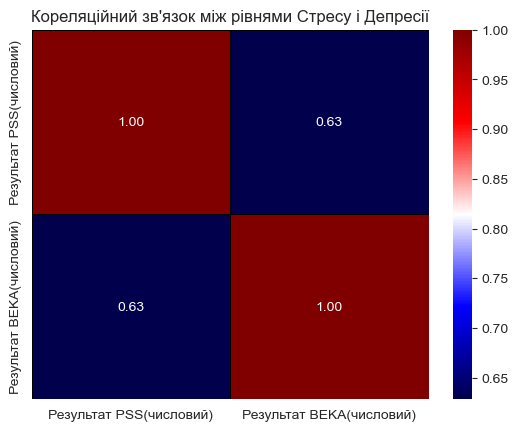

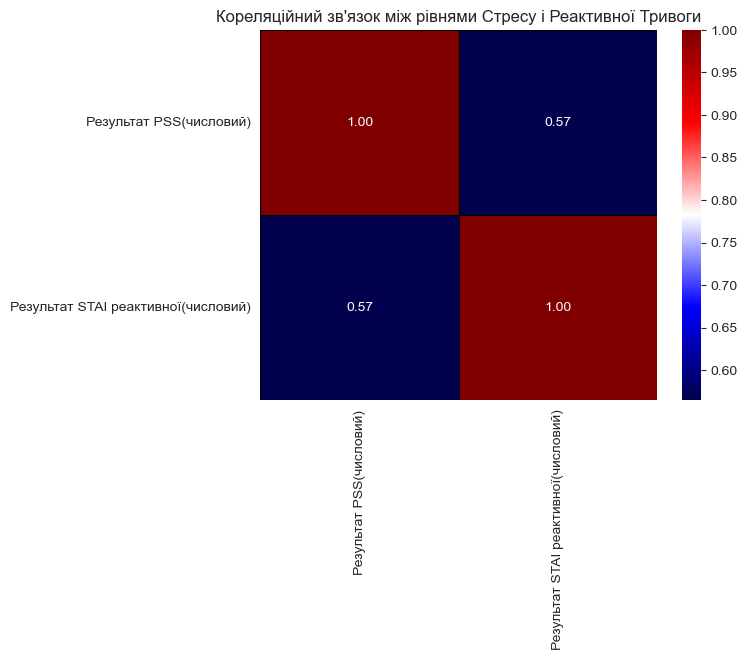

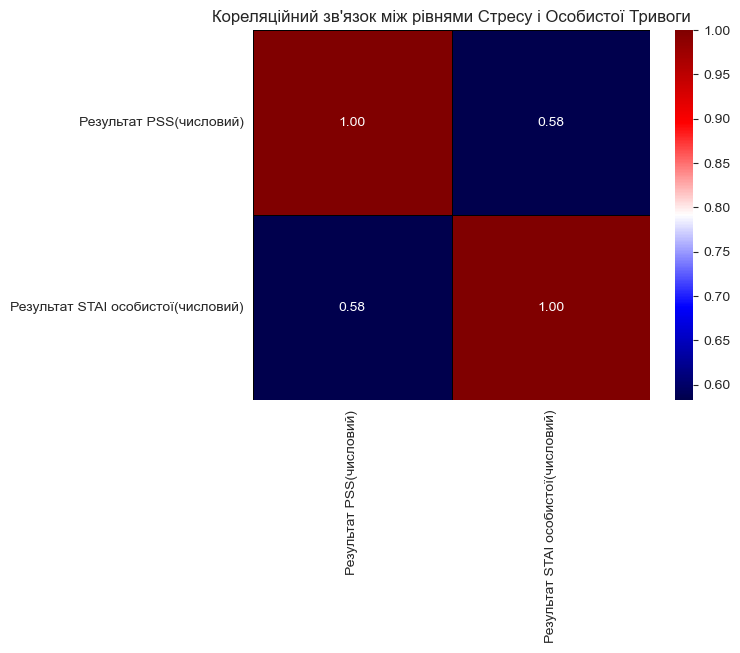

In [114]:
#df = df.drop(columns=['Результат PSS(текстовий)','Результат BEKA(текстовий)','Результат STAI(текстовий)'])
corr_matrix = df_sel.iloc[:, [4,6]].corr()
corr_matrix2 = df_sel.iloc[:, [4,8]].corr()
corr_matrix3 = df_sel.iloc[:, [4,10]].corr()


df = df_sel.rename(columns={'Результат PSS(числовий)': 'Рівень стресу(PSS)', 'Результат BEKA(числовий)':'Рівень депресії(BEKA)','Результат STAI реактивної(числовий)':'Рівень реактивної тривоги(STAI)', 'Результат STAI особистої(числовий)':'Рівень особистої тривоги(STAI)'})
heatmap = sns.heatmap(corr_matrix,annot=True, fmt='.2f', cmap="seismic", cbar=True, linewidths=0.5, linecolor='black')
plt.title('Кореляційний зв\'язок між рівнями Стресу і Депресії')
plt.show()
plt.title('Кореляційний зв\'язок між рівнями Стресу і Реактивної Тривоги')
heatmap2 = sns.heatmap(corr_matrix2,annot=True, fmt='.2f', cmap="seismic", cbar=True, linewidths=0.5, linecolor='black')
plt.show()
plt.title('Кореляційний зв\'язок між рівнями Стресу і Особистої Тривоги')
heatmap2 = sns.heatmap(corr_matrix3,annot=True, fmt='.2f', cmap="seismic", cbar=True, linewidths=0.5, linecolor='black')
plt.show()

In [115]:
df.head()

,Стать,Вік,Професія,Email Address,Рівень стресу(PSS),Результат PSS(текстовий),Рівень депресії(BEKA),Результат BEKA(текстовий),Рівень реактивної тривоги(STAI),Результат STAI реактивної(текстовий),Рівень особистої тривоги(STAI),Результат STAI особистої(текстовий)
0,Чоловік,22,Програміст,mplakushko@gmail.com,28,Високий рівень стресу,26,Помірна депресія,32,Помірний рівень реактивної тривожності,27,Помірний рівень реактивної тривожності
1,Жінка,33,Блогер,mane4ka20@gmail.com,24,Середній рівень стресу,12,Легка депресія,25,Помірний рівень реактивної тривожності,25,Помірний рівень реактивної тривожності
2,Жінка,33,викладач,liza.miller008@gmail.com,6,Низький рівень стресу,6,Відсутність депресії,18,Низький рівень реактивної тривожності,11,Низький рівень реактивної тривожності
3,Жінка,33,Бухгалтер,ifinka14@gmail.com,12,Низький рівень стресу,21,Помірна депресія,27,Помірний рівень реактивної тривожності,28,Помірний рівень реактивної тривожності
4,Жінка,55,бухгалтер,oxana9970@gmail.com,20,Середній рівень стресу,15,Легка депресія,25,Помірний рівень реактивної тривожності,24,Помірний рівень реактивної тривожності


In [126]:
import statistics
df_fem = df[df['Стать'] == 'Жінка']
df_male = df[df['Стать'] == 'Чоловік']
df_fem.head(40)
# avg_stress_m = statistics.mean(df_male['Рівень стресу(PSS)'].to_numpy())
# avg_depression_m = statistics.mean(df_male['Рівень депресії(BEKA)'].to_numpy())
# avg_anex_react_m = statistics.mean(df_male['Результат STAI реактивної(числовий)'].to_numpy())
# avg_anex_personal_m = statistics.mean(df_male['Результат STAI особистої(числовий)'].to_numpy())
# print("Чоловіки",avg_stress_m, avg_depression_m, avg_anex_react_m, avg_anex_personal_m)
# avg_stress_m = statistics.mean(df_fem['Рівень стресу(PSS)'].to_numpy())
# avg_depression_m = statistics.mean(df_fem['Рівень депресії(BEKA)'].to_numpy())
# avg_anex_react_m = statistics.mean(df_fem['Результат STAI реактивної(числовий)'].to_numpy())
# avg_anex_personal_m = statistics.mean(df_fem['Результат STAI особистої(числовий)'].to_numpy())
# 
# print("Жінки", avg_stress_m, avg_depression_m, avg_anex_react_m, avg_anex_personal_m)

,Стать,Вік,Професія,Email Address,Рівень стресу(PSS),Результат PSS(текстовий),Рівень депресії(BEKA),Результат BEKA(текстовий),Рівень реактивної тривоги(STAI),Результат STAI реактивної(текстовий),Рівень особистої тривоги(STAI),Результат STAI особистої(текстовий)
1,Жінка,33,Блогер,mane4ka20@gmail.com,24,Середній рівень стресу,12,Легка депресія,25,Помірний рівень реактивної тривожності,25,Помірний рівень реактивної тривожності
2,Жінка,33,викладач,liza.miller008@gmail.com,6,Низький рівень стресу,6,Відсутність депресії,18,Низький рівень реактивної тривожності,11,Низький рівень реактивної тривожності
3,Жінка,33,Бухгалтер,ifinka14@gmail.com,12,Низький рівень стресу,21,Помірна депресія,27,Помірний рівень реактивної тривожності,28,Помірний рівень реактивної тривожності
4,Жінка,55,бухгалтер,oxana9970@gmail.com,20,Середній рівень стресу,15,Легка депресія,25,Помірний рівень реактивної тривожності,24,Помірний рівень реактивної тривожності
5,Жінка,20,немає,kn21-o.kosohor@nubip.edu.ua,7,Низький рівень стресу,11,Легка депресія,18,Низький рівень реактивної тривожності,24,Помірний рівень реактивної тривожності
6,Жінка,29,Методист,aleksandrablozva@gmail.com,16,Середній рівень стресу,16,Легка депресія,44,Високий рівень реактивної тривожності,40,Високий рівень реактивної тривожності
7,Жінка,36,Секретар,glyshmananzelika@gmail.com,17,Середній рівень стресу,16,Легка депресія,31,Помірний рівень реактивної тривожності,31,Помірний рівень реактивної тривожності
9,Жінка,21,Студент,karpenkok2606@gmail.com,28,Високий рівень стресу,10,Легка депресія,30,Помірний рівень реактивної тривожності,34,Помірний рівень реактивної тривожності
11,Жінка,20,Студентка,red.lizard96@gmail.com,31,Високий рівень стресу,29,Помірна депресія,41,Високий рівень реактивної тривожності,42,Високий рівень реактивної тривожності
16,Жінка,18,Студентка,kn21-l.skorobohata@nubip.edu.ua,15,Середній рівень стресу,17,Легка депресія,24,Помірний рівень реактивної тривожності,23,Помірний рівень реактивної тривожності


In [131]:
sting = "ПСИХОЛОГІЯ СТРЕСУ ТА СТРЕСОВИХ РОЗЛАДІВ"
print(sting.lower())

психологія стресу та стресових розладів


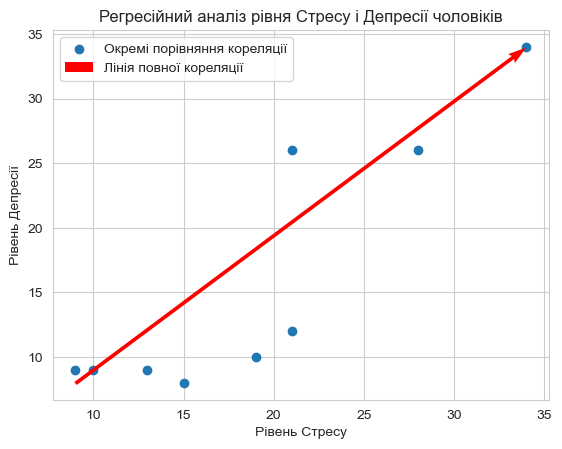

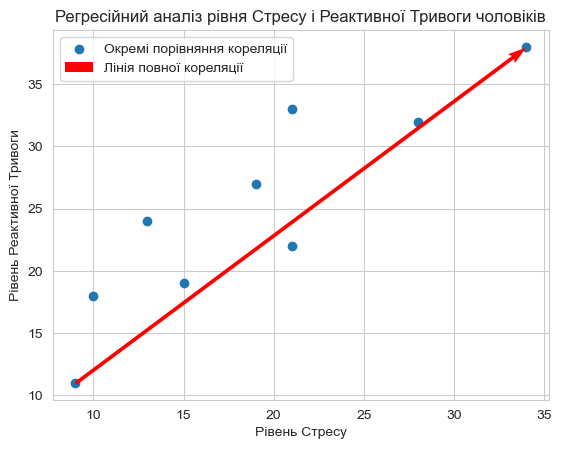

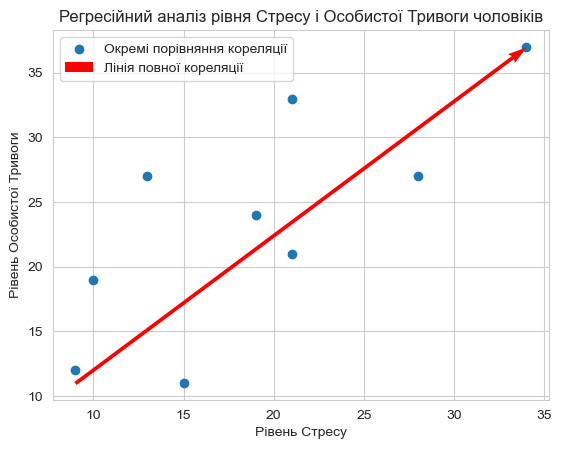

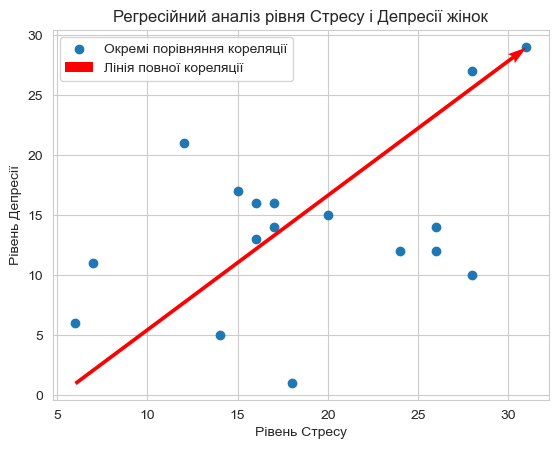

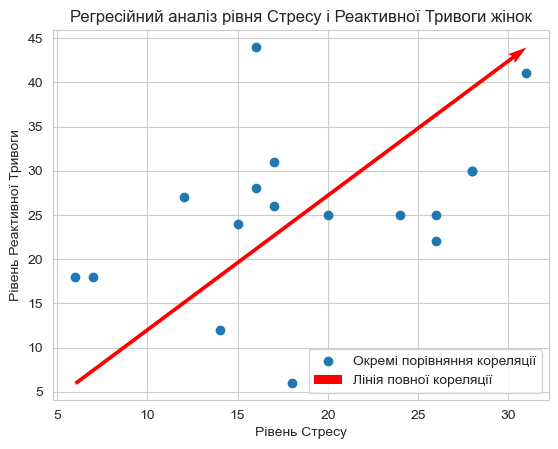

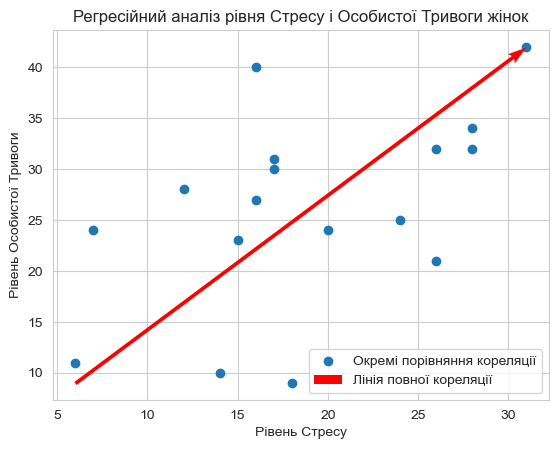

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

x = df_male['Рівень стресу(PSS)']
y = df_male['Рівень депресії(BEKA)']
z = df_male['Рівень реактивної тривоги(STAI)']
z1 = df_male['Рівень особистої тривоги(STAI)']

x_f = df_fem['Рівень стресу(PSS)']
y_f = df_fem['Рівень депресії(BEKA)']
z_f = df_fem['Рівень реактивної тривоги(STAI)']
z1_f = df_fem['Рівень особистої тривоги(STAI)']

np.corrcoef(x, y)
plt.scatter(x, y, label='Окремі порівняння кореляції')
plt.xlabel("Рівень Стресу")
plt.ylabel("Рівень Депресії")
plt.title('Регресійний аналіз рівня Стресу і Депресії чоловіків')
plt.quiver(min(x), min(y), max(x) - min(x), max(y) - min(y), angles='xy', scale_units='xy', scale=1, color='red', label='Лінія повної кореляції')
plt.legend()
plt.show()

np.corrcoef(x, z)
plt.scatter(x, z, label='Окремі порівняння кореляції')
plt.xlabel("Рівень Стресу")
plt.ylabel("Рівень Реактивної Тривоги")
plt.quiver(min(x), min(z), max(x) - min(x), max(z) - min(z), angles='xy', scale_units='xy', scale=1, color='red', label='Лінія повної кореляції')
plt.title('Регресійний аналіз рівня Стресу і Реактивної Тривоги чоловіків')
plt.legend()
plt.show()

np.corrcoef(x, z1)
plt.scatter(x, z1, label='Окремі порівняння кореляції')
plt.xlabel("Рівень Стресу")
plt.ylabel("Рівень Особистої Тривоги")
plt.quiver(min(x), min(z1), max(x) - min(x), max(z1) - min(z1), angles='xy', scale_units='xy', scale=1, color='red', label='Лінія повної кореляції')
plt.title('Регресійний аналіз рівня Стресу і Особистої Тривоги чоловіків')
plt.legend()
plt.show()

np.corrcoef(x_f, y_f)
plt.scatter(x_f, y_f, label='Окремі порівняння кореляції')
plt.xlabel("Рівень Стресу")
plt.ylabel("Рівень Депресії")
plt.title('Регресійний аналіз рівня Стресу і Депресії жінок')
plt.quiver(min(x_f), min(y_f), max(x_f) - min(x_f), max(y_f) - min(y_f), angles='xy', scale_units='xy', scale=1, color='red', label='Лінія повної кореляції')
plt.legend()
plt.show()

np.corrcoef(x_f, z_f)
plt.scatter(x_f, z_f, label='Окремі порівняння кореляції')
plt.xlabel("Рівень Стресу")
plt.ylabel("Рівень Реактивної Тривоги")
plt.quiver(min(x_f), min(z_f), max(x_f) - min(x_f), max(z_f) - min(z_f), angles='xy', scale_units='xy', scale=1, color='red', label='Лінія повної кореляції')
plt.title('Регресійний аналіз рівня Стресу і Реактивної Тривоги жінок')
plt.legend()
plt.show()

np.corrcoef(x_f, z1_f)
plt.scatter(x_f, z1_f, label='Окремі порівняння кореляції')
plt.xlabel("Рівень Стресу")
plt.ylabel("Рівень Особистої Тривоги")
plt.quiver(min(x_f), min(z1_f), max(x_f) - min(x_f), max(z1_f) - min(z1_f), angles='xy', scale_units='xy', scale=1, color='red', label='Лінія повної кореляції')
plt.title('Регресійний аналіз рівня Стресу і Особистої Тривоги жінок')
plt.legend()
plt.show()


Rozmiar zestawu treningowego: (20, 3)
Rozmiar zestawu testowego: (6, 3)
Rozmiar pierwotnego setu: (26, 12)
MAE: 4.640782369336661
MSE: 26.43215604746663
RMSE: 5.1412212603103
R^2: 0.6169252746743967


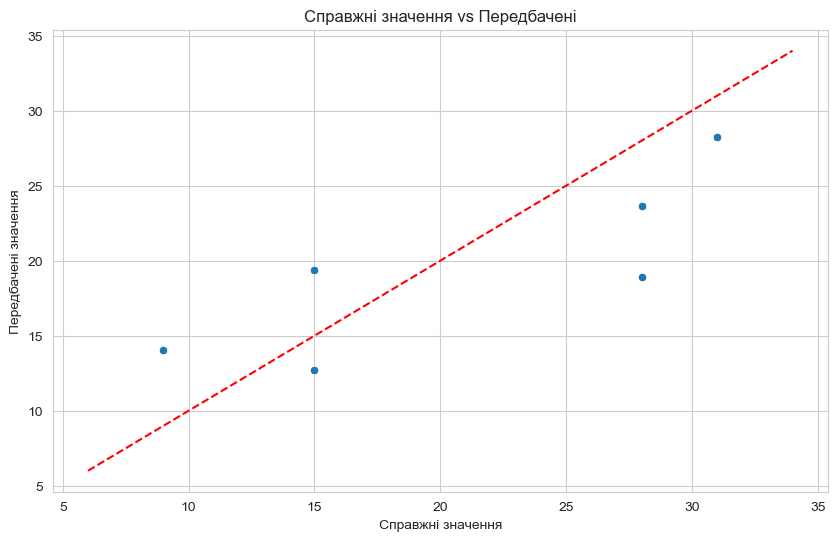

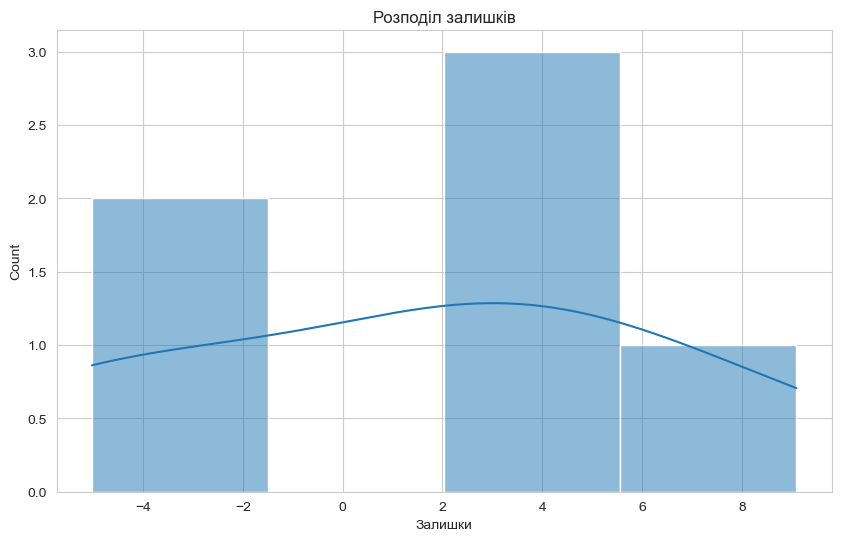

Коефіцієнти моделі: [ 0.42335313 -0.07545351  0.26785932]
Перехоплення: 7.830638948762775
R² моделі: 0.4257616973437609
                            OLS Regression Results                            
Dep. Variable:     Рівень стресу(PSS)   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     5.437
Date:                Sun, 10 Nov 2024   Prob (F-statistic):            0.00595
Time:                        11:52:37   Log-Likelihood:                -81.563
No. Observations:                  26   AIC:                             171.1
Df Residuals:                      22   BIC:                             176.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025   

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,roc_curve,precision_score, recall_score,f1_score, ConfusionMatrixDisplay
import statsmodels.api as sm




X = df.iloc[:, [6,8,10]]
y = df['Рівень стресу(PSS)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Rozmiar zestawu treningowego:", X_train.shape)
print("Rozmiar zestawu testowego:", X_test.shape)
print("Rozmiar pierwotnego setu:", df.shape)
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Лінія ідеального передбачення
plt.xlabel('Справжні значення')
plt.ylabel('Передбачені значення')
plt.title('Порівняння справжніх та передбачених даних')
plt.show()

# Побудова залишків
plt.figure(figsize=(10, 6))
sns.histplot((y_test - y_pred), kde=True)
plt.xlabel('Залишки')
plt.title('Розподіл залишків')
plt.show()

# Отримання коефіцієнтів
print("Коефіцієнти моделі:", model.coef_)
print("Перехоплення:", model.intercept_)

# Оцінка точності моделі
print("R² моделі:", model.score(X, y))

# Додавання константи для перехоплення
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Підсумки моделі
print(model.summary())


In [44]:
df_male.head(40)

,Стать,Вік,Професія,Email Address,Рівень стресу(PSS),Результат PSS(текстовий),Рівень депресії(BEKA),Результат BEKA(текстовий),Результат STAI реактивної(числовий),Результат STAI реактивної(текстовий),Результат STAI особистої(числовий),Результат STAI особистої(текстовий)
0,Чоловік,22,Програміст,mplakushko@gmail.com,28,Високий рівень стресу,26,Помірна депресія,32,Помірний рівень реактивної тривожності,27,Помірний рівень реактивної тривожності
8,Чоловік,20,Айті,minedinnerbone@gmail.com,9,Низький рівень стресу,9,Відсутність депресії,11,Низький рівень реактивної тривожності,12,Низький рівень реактивної тривожності
10,Чоловік,20,"спеціальність ""Комп'ютерні науки""",megassv10122003@gmail.com,10,Низький рівень стресу,9,Відсутність депресії,18,Низький рівень реактивної тривожності,19,Низький рівень реактивної тривожності
12,Чоловік,20,студент,kn21-p.chernenko@nubip.edu.ua,19,Середній рівень стресу,10,Легка депресія,27,Помірний рівень реактивної тривожності,24,Помірний рівень реактивної тривожності
13,Чоловік,20,студент,dimaolshanskij@gmail.com,21,Середній рівень стресу,26,Помірна депресія,33,Помірний рівень реактивної тривожності,33,Помірний рівень реактивної тривожності
14,Чоловік,21,кн,koldronokok@gmail.com,34,Високий рівень стресу,34,Важка депресія,38,Помірний рівень реактивної тривожності,37,Помірний рівень реактивної тривожності
15,Чоловік,20,Програміст,kn21-v.chaliuk@nubip.edu.ua,21,Середній рівень стресу,12,Легка депресія,22,Помірний рівень реактивної тривожності,21,Помірний рівень реактивної тривожності
19,Чоловік,17,Студент,mark24-ye.pihol@nubip.edu.ua,13,Низький рівень стресу,9,Відсутність депресії,24,Помірний рівень реактивної тривожності,27,Помірний рівень реактивної тривожності
24,Чоловік,20,Студент,nik988058@gmail.com,15,Середній рівень стресу,8,Відсутність депресії,19,Низький рівень реактивної тривожності,11,Низький рівень реактивної тривожності


In [45]:
df_male_low = df_male[(df_male['Рівень стресу(PSS)'] < 14) & (df_male['Рівень стресу(PSS)'] > 0)]
df_male_mid = df_male[(df_male['Рівень стресу(PSS)'] >= 14) & (27 > df_male['Рівень стресу(PSS)'])]
df_male_high = df_male[(df_male['Рівень стресу(PSS)'] >= 27) & (40 >= df_male['Рівень стресу(PSS)'])]
df_fem_low = df_fem[(df_fem['Рівень стресу(PSS)'] > 0) & (14 > df_fem['Рівень стресу(PSS)'])]
df_fem_mid = df_fem[(27 > df_fem['Рівень стресу(PSS)']) & (df_fem['Рівень стресу(PSS)'] >= 14)]
df_fem_high = df_fem[(40 >= df_fem['Рівень стресу(PSS)']) & (df_fem['Рівень стресу(PSS)'] >= 27)]
#df_sel.info(verbose=True)
#df_sel.head(40)
df_personal_aware_low = df_fem[(df_fem['Рівень тривоги(STAI)'] < 40) & (df_fem['Рівень стресу(PSS)'] >= 27)  &  (df_fem['Рівень депресії(BEKA)'] >= 30)]
df_personal_aware_mid = df_fem[(df_fem['Рівень тривоги(STAI)'] >= 40) & (df_fem['Рівень тривоги(STAI)'] < 80) & (df_fem['Рівень стресу(PSS)'] >= 27)  &  (df_fem['Рівень депресії(BEKA)'] >= 30)]
df_personal_aware_high = df_fem[(df_fem['Рівень тривоги(STAI)'] >=80) & (df_fem['Рівень тривоги(STAI)'] < 120) & (df_fem['Рівень стресу(PSS)'] >= 27)  &  (df_fem['Рівень депресії(BEKA)'] >= 30)]
#print(df_personal_aware_low, df_personal_aware_mid, df_personal_aware_high)
#df_personal_aware_high.head(10)
#df_fem[(df_fem['Рівень тривоги(STAI)'] < 40)].head(10)
#df_fem[(df_fem['Рівень тривоги(STAI)'] < 80) & (df_fem['Рівень тривоги(STAI)'] >= 40)].head(10)
#df_fem[(df_fem['Рівень тривоги(STAI)'] >= 80)].head(10)
df_male.head()
#df_sel[["Стать", "Результат PSS(текстовий)", "Результат BEKA(текстовий)", "Результат STAI(текстовий)"]].groupby("Стать")
# data_frame = dffull
# 
# # Вилучення списку колонок в окрему змінну
# columns_to_group = ["Стать", "Результат PSS(текстовий)", "Результат BEKA(текстовий)", "Результат STAI(текстовий)_x"]
# 
# # Групування даних та обчислення середнього
# grouped_mean_result = data_frame[columns_to_group].groupby("Стать").mean()
# 
# # Виведення результату групування і підрахунку середнього значення
# print(grouped_mean_result)
# print("Інфо чоловіки низьк стрес")
# df_male_low.head(40)
# print("Чол сер")
# df_male_mid.head(40)
# print("Чол вис")
# df_male_high.head(40)
# print("Жінк низьк")
# df_fem_low.head(111)
# print("Жінк сер")
# df_fem_mid.head(40)
# print("Жінк вис")
# df_fem_high.head(40)

KeyError: 'Рівень тривоги(STAI)'

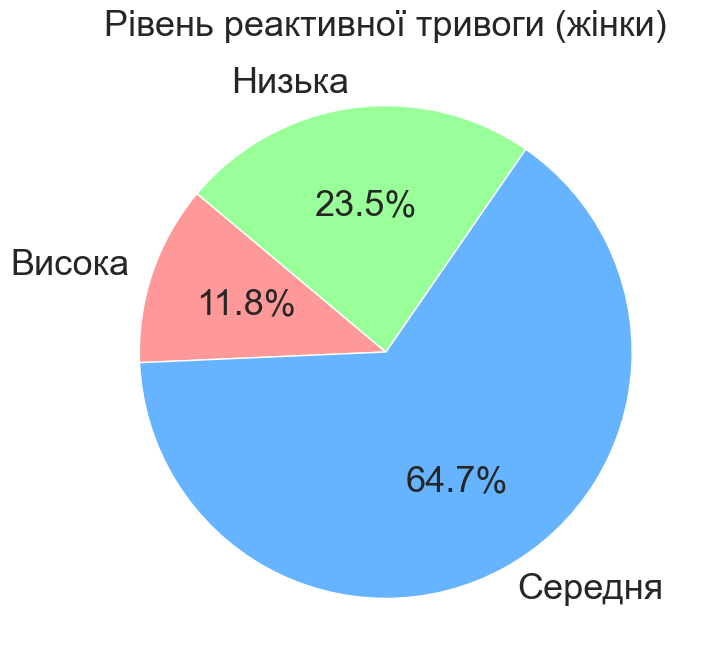

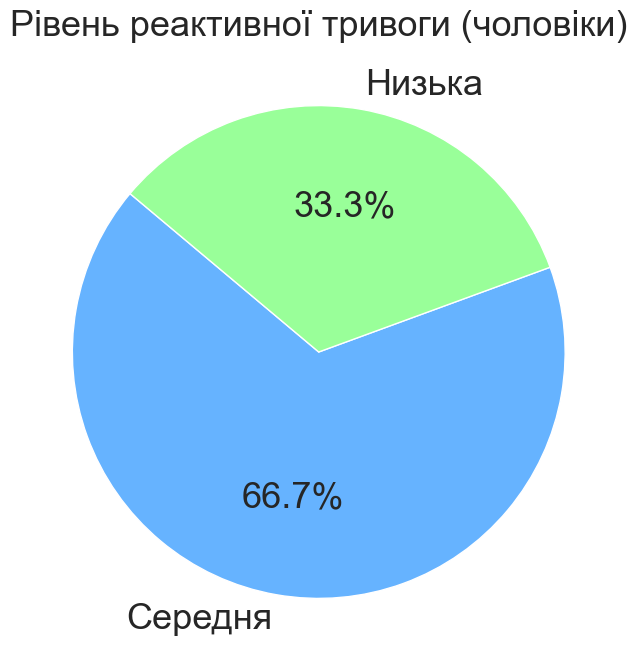

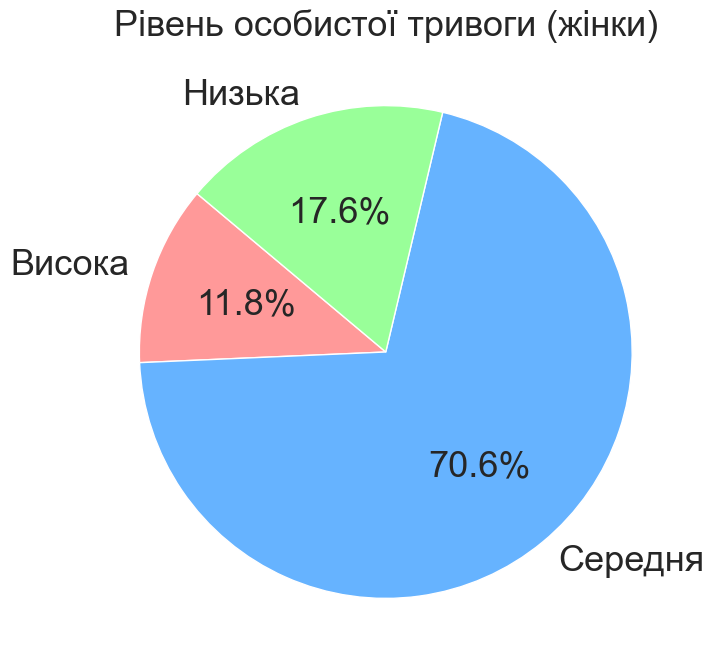

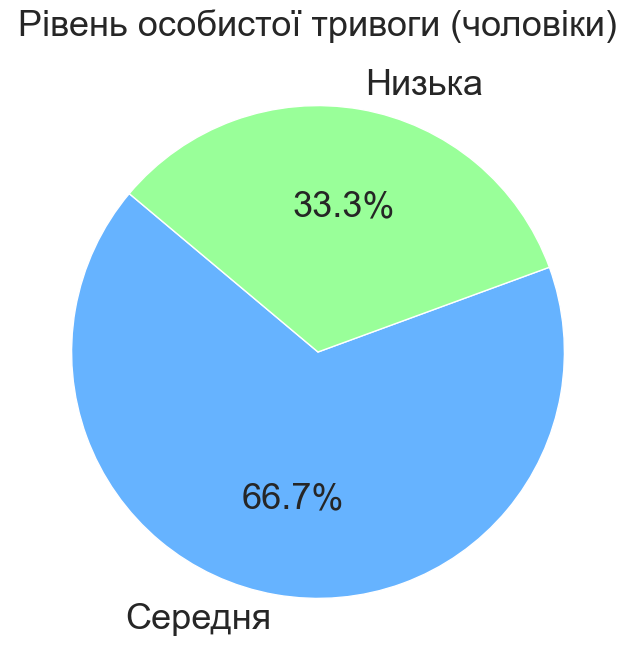

In [49]:
# Дані для тортового графіка
labels = ['Висока', 'Середня', 'Низька']
labels_male_STAI = ['Середня', 'Низька']

sizes_PSS_fem = [11.8, 70.6, 17.6]  # Відсотки або значення кожної категорії
sizes_BEKA_fem = [11.8, 70.6, 17.6]  # Відсотки або значення кожної категорії
sizes_PSS_male = [11.8, 70.6, 17.6]  # Відсотки або значення кожної категорії
sizes_BEKA_male = [11.8, 70.6, 17.6]  # Відсотки або значення кожної категорії

sizes_STAI_react_fem = [11.8, 64.7, 23.5]  # Відсотки або значення кожної категорії
sizes_STAI_personal_fem = [11.8, 70.6, 17.6]  # Відсотки або значення кожної категорії
sizes_STAI_react_male = [66.7, 33.3]  # Відсотки або значення кожної категорії
sizes_STAI_personal_male = [66.7, 33.3]  # Відсотки або значення кожної категорії
colors = ['#ff9999','#66b3ff','#99ff99']  # Кольори для кожного сегмента
colors_male = ['#66b3ff','#99ff99']  # Кольори для кожного сегмента
explode = (0, 0, 0)  # Відокремлення першого сегменту (0.1 означає легке зміщення)
explode_male = (0, 0)  # Відокремлення першого сегменту (0.1 означає легке зміщення)

# Побудова тортового графіка
plt.figure(figsize=(8, 8))
plt.pie(sizes_STAI_react_fem, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 26})
plt.title("Рівень реактивної тривоги (жінки)", fontsize=26)
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(sizes_STAI_react_male, explode=explode_male, labels=labels_male_STAI, colors=colors_male,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 26})
plt.title("Рівень реактивної тривоги (чоловіки)", fontsize=26)
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(sizes_STAI_personal_fem, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 26})
plt.title("Рівень особистої тривоги (жінки)", fontsize=26)
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(sizes_STAI_personal_male, explode=explode_male, labels=labels_male_STAI, colors=colors_male,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 26})
plt.title("Рівень особистої тривоги (чоловіки)", fontsize=26)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Приклад даних
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 13, 20, 22]      # Перша серія даних (лінія)
y2 = [100, 110, 105, 130, 140] # Друга серія даних (лінія)
bar_data = [8, 12, 14, 19, 17] # Дані для стовпчиків

# Створення основного графіка
fig, ax1 = plt.subplots()

# Побудова першої кривої на основній осі Y
ax1.plot(x, y1, color='b', label="Серія 1")
ax1.set_xlabel("Значення X")    # Ось X спільна для обох кривих
ax1.set_ylabel("Серія 1", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Додавання другої осі Y для другої серії даних
ax2 = ax1.twinx()  
ax2.plot(x, y2, color='r', label="Серія 2")
ax2.set_ylabel("Серія 2", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Додавання стовпчикової діаграми
width = 0.3  # Ширина стовпців
ax1.bar(np.array(x) - width / 2, bar_data, width, color='gray', alpha=0.6, label="Стовпчики")

# Заголовок та легенда
fig.suptitle("Порівняння лінійних графіків і стовпчикової діаграми")
fig.tight_layout()  # Щоб уникнути перекриття елементів
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

In [21]:
x_m = df_male['Рівень стресу(PSS)']
y_m = df_male['Рівень депресії(BEKA)']  # Перша серія даних
y_m_r = df_male['Результат STAI реактивної(числовий)']  # Друга серія даних з іншим масштабом
y_m_p = df_male['Результат STAI особистої(числовий)']

df_male.reset_index(drop=True, inplace=True)
idx = df_male.index.to_list()
idx = [x + 1 for x in idx]
df_fem.reset_index(drop=True, inplace=True)
id_f = df_fem.index.to_list()
id_f = [x + 1 for x in id_f]

x_f = df_fem['Рівень стресу(PSS)']
y_f = df_fem['Рівень депресії(BEKA)'] 
y_f_r = df_fem['Результат STAI реактивної(числовий)'] 
y_f_p = df_fem['Результат STAI особистої(числовий)'] 

plt.figure(figsize=(10, 6))
plt.plot(idx, x_m, marker='.', color='b', label='Значення стресу')
plt.plot(idx, y_m, marker='s', color='r', label='Значення депресії')
plt.plot(idx, y_m_r, marker='o', color='g', label='Значення реактивної тривоги')
plt.xlabel("ID")
plt.ylabel("Значення")
plt.title("Порівняння результатів чоловіків")
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(idx, x_m, marker='.', color='b', label='Значення стресу')
plt.plot(idx, y_m, marker='s', color='r', label='Значення депресії')
plt.plot(idx, y_m_p, marker='d', color='y', label='Значення особистої тривоги')
plt.xlabel("ID")
plt.ylabel("Значення")
plt.title("Порівняння результатів чоловіків")
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(id_f, x_f, marker='.', color='b', label='Значення стресу')
plt.plot(id_f, y_f, marker='s', color='r', label='Значення депресії')
plt.plot(id_f, y_f_r, marker='o', color='g', label='Значення реактивної тривоги')
plt.xlabel("ID")
plt.ylabel("Значення")
plt.title("Порівняння результатів жінок")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(id_f, x_f, marker='.', color='b', label='Значення стресу')
plt.plot(id_f, y_f, marker='s', color='r', label='Значення депресії')
plt.plot(id_f, y_f_p, marker='d', color='y', label='Значення особистої тривоги')
plt.xlabel("ID")
plt.ylabel("Значення")
plt.title("Порівняння результатів жінок")
plt.legend()
plt.show()


NameError: name 'df_male' is not defined